In [14]:
import mne
from specparam import SpectralGroupModel
from utils import examine_spectra, plot_specparam_on_scalp, plot_models

freq_range = [2, 40]
fg = SpectralGroupModel(
    peak_width_limits=[1, 6],
    min_peak_height=0.15,
    peak_threshold=2.0,
    max_n_peaks=6,
    verbose=False,
)

Reading /Users/daniel/PhD/Projects/psd-path/final_results/sub-101_interpolated-epo.fif ...
    Found the data of interest:
        t =       0.00 ...    5000.00 ms
        0 CTF compensation matrices available
Not setting metadata
76 matching events found
No baseline correction applied
0 projection items activated
    Using multitaper spectrum estimation with 7 DPSS windows


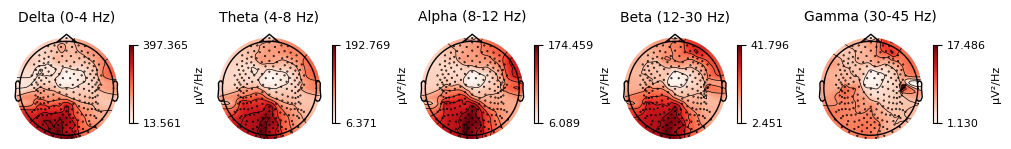

    Using multitaper spectrum estimation with 7 DPSS windows
Plotting power spectral density (dB=True).
Averaging across epochs...


/Users/daniel/.pyenv/versions/conda-paths-3.12/lib/python3.12/site-packages/mne/viz/utils.py:167: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  (fig or plt).show(**kwargs)


    Using multitaper spectrum estimation with 7 DPSS windows


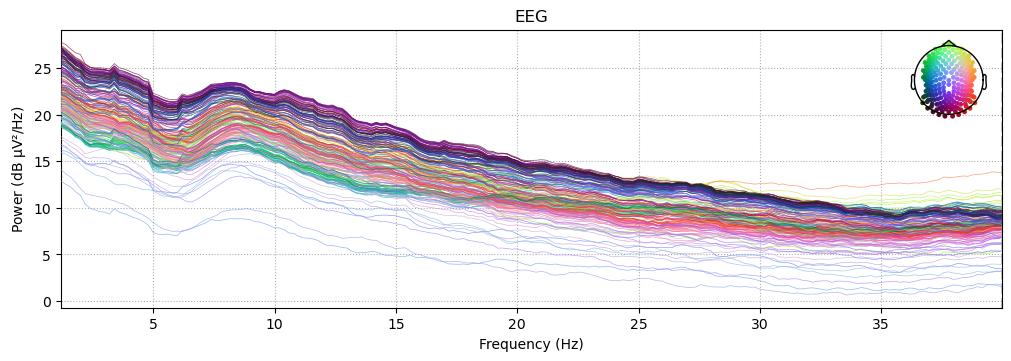

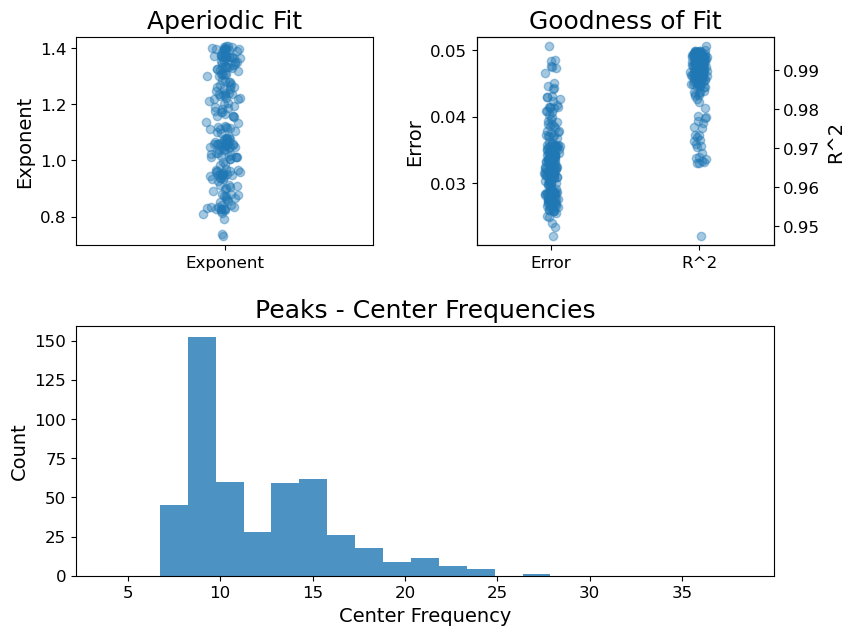

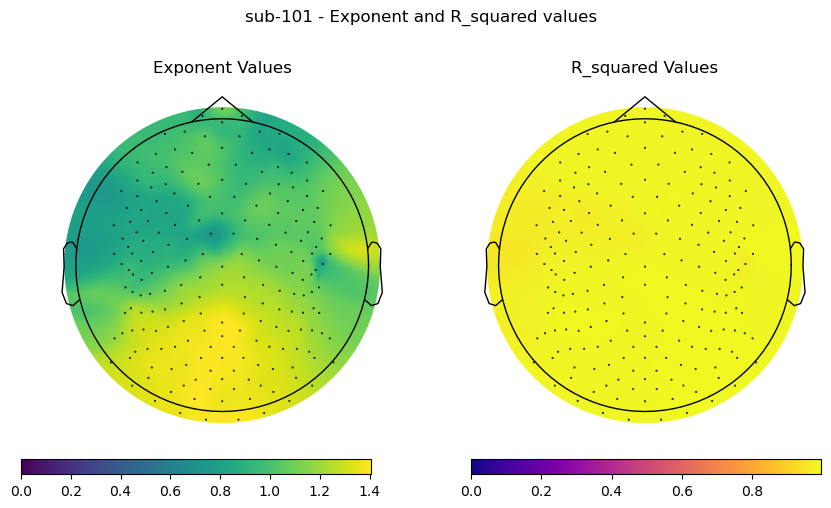

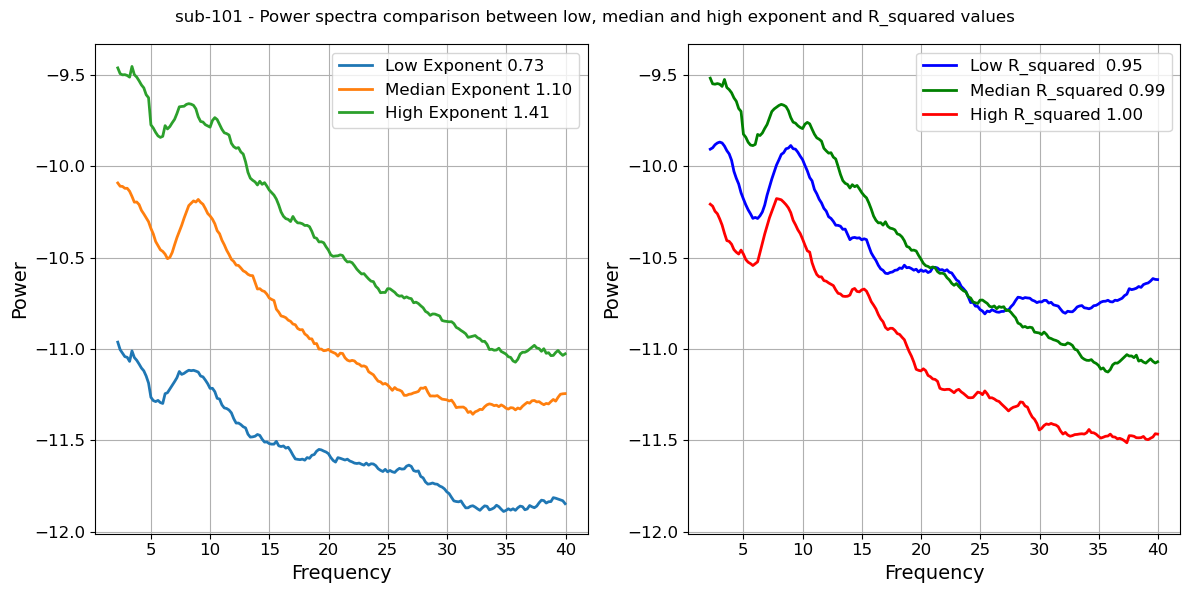

In [16]:
subject = 101
epochs = mne.read_epochs(f"sub-{subject}_interpolated-epo.fif")
_ = epochs.compute_psd().plot_topomap()
_ = epochs.compute_psd(fmin=1, fmax=40).plot(picks="eeg", amplitude=False)

psd = epochs.compute_psd().average()
spectra, freqs = psd.get_data(return_freqs=True)
# Initialize a FOOOFGroup object, with desired settings

# Define the frequency range to fit

fg.fit(freqs, spectra, freq_range)
fg.plot()
plot_specparam_on_scalp(fg, epochs, subject)
examine_spectra(fg, subject)
# plot models that are smallest, median and highest exponent
# plot_models(fg, param_choice="exponent")
# plot models with worst, median and best goodness of fit
# plot_models(fg, param_choice="r_squared")